In [51]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Read the data
data = pd.read_csv('clustering.csv')

In [53]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [54]:
data.shape

(381, 13)

Text(0.5, 1.0, 'Loan amount vs. Applicant income')

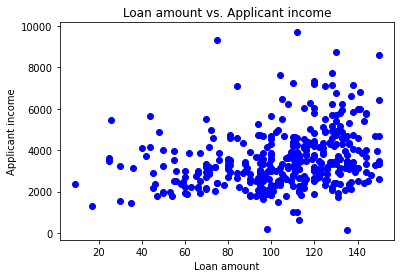

In [55]:
X = data[['LoanAmount','ApplicantIncome']]
plt.scatter(X['LoanAmount'], X['ApplicantIncome'], c='b')
plt.xlabel('Loan amount')
plt.ylabel('Applicant income')
plt.title('Loan amount vs. Applicant income')

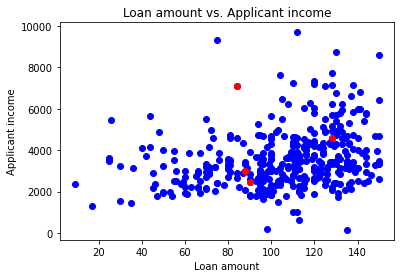

In [56]:
# Choose k number of clusters, and randomly select the centroids
k = 4
centroids = X.sample(n=k)

# Display the initial centroids on the graph
plt.scatter(X['LoanAmount'], X['ApplicantIncome'], c='blue')
plt.scatter(centroids['LoanAmount'], centroids['ApplicantIncome'], c='red')
plt.xlabel('Loan amount')
plt.ylabel('Applicant income')
plt.title('Loan amount vs. Applicant income')
plt.show()

In [57]:
type(centroids.values)

numpy.ndarray

In [58]:
type(centroids)

pandas.core.frame.DataFrame

In [59]:
for i, row in centroids.iterrows():
    print(row)

LoanAmount          128.0
ApplicantIncome    4583.0
Name: 0, dtype: float64
LoanAmount           88.0
ApplicantIncome    2987.0
Name: 375, dtype: float64
LoanAmount           84.0
ApplicantIncome    7085.0
Name: 290, dtype: float64
LoanAmount           90.0
ApplicantIncome    2483.0
Name: 289, dtype: float64


In [60]:
type(X)

pandas.core.frame.DataFrame

In [61]:
# Run the k-means algorithmns
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = X.sample(n=k).values # Choose k random centroid 
    while diff:
        for i, row in X.iterrows():
            min_d = float('inf')
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((row[0] - centroid[0])**2 + (row[1] - centroid[1])**2)
                if min_d > d:
                    min_d = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        
        # Count number of differences
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [62]:
centroids, cluster = kmeans(X,k)

In [63]:
centroids

array([[ 124.41935484, 6886.70967742],
       [  95.96581197, 2196.5042735 ],
       [ 104.38815789, 3369.63157895],
       [ 111.7037037 , 4706.88888889]])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


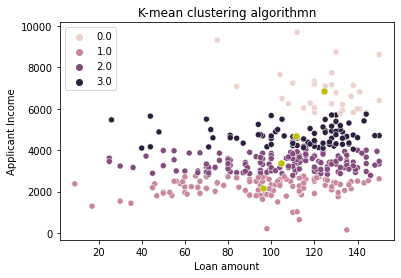

In [64]:
sns.scatterplot(X['LoanAmount'], X['ApplicantIncome'], hue = cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=50, color='y')
plt.xlabel('Loan amount')
plt.ylabel('Applicant Income')
plt.title('K-mean clustering algorithmn')
plt.show()

In [39]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    X = X.values
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    return sum

In [40]:
# Use the elbow method to find the optimal k
cost_list = []
for k in range(1,10):
    centroids, cluster = kmeans(X, k)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

In [41]:
cost_list

[407191.41309939686,
 260020.42770904241,
 188962.42849695045,
 140863.66839342698,
 123635.45045752024,
 111942.80913864846,
 86442.14973255982,
 77756.89063117003,
 70095.742358068]

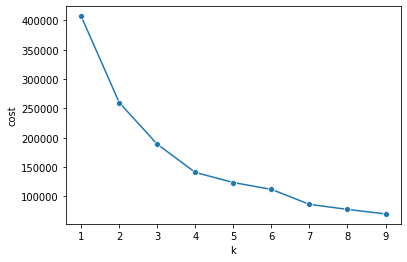

In [43]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('cost')
plt.show()

In [67]:
pip install scikit-learn

     |████████████████████████████████| 7.8 MB 4.1 MB/s            
     |████████████████████████████████| 306 kB 12.5 MB/s            
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [68]:
from sklearn.cluster import KMeans

In [70]:
da = pd.read_csv("wholesale_customers_data.csv")
da.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [71]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


Since clustering algorithms including kmeans use distance-based measurements to determine the similarity between data points, it’s recommended to standardize the data (mean of zero and a standard deviation of one)

In [72]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
da_scaled = scaler.fit_transform(da)

In [73]:
pd.DataFrame(da_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [75]:
pd.DataFrame(da_scaled).head()

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [77]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(da_scaled)

KMeans(n_clusters=2)

In [78]:
# inertia on the fitted data
kmeans.inertia_

2599.38555935614

Text(0, 0.5, 'Inertia')

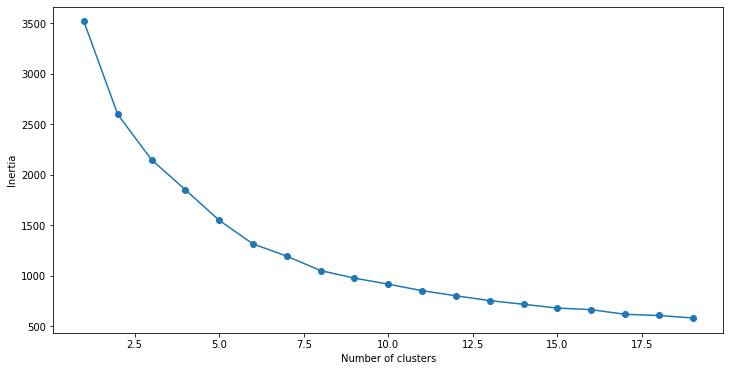

In [80]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(da_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [83]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeanseans(n_clusters = 5, init='k-means++')
kmeans.fit(da_scaled)
pred = kmeans.predict(da_scaled)

In [84]:
frame = pd.DataFrame(da_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    211
0    126
1     92
4     10
2      1
Name: cluster, dtype: int64